In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from selenium import webdriver
import numpy as np

import pandas_profiling
import requests
import re
import os

## Descripción del presente trabajo

## Obtención de datos de manera automática

In [80]:
# Creamos una función para descargar automáticamente los csv's del senamhi para el año 2018
def download_csvs(path):
    # Utilizamos Chrome
    driver = webdriver.Chrome(r"C:\Users\defsa\chromedriver.exe")

    # El url del website
    url = path

    # Abrir el url
    driver.get(url)
    time.sleep(2)

    # Reconocer el botón por su ID
    button = driver.find_element_by_id("export2")

    # Realizar un click en el botón
    button.click()

In [ ]:
# Con la función definida, realizamos la extracción de csv's de manera automática

# De enero a septiembre
for i in range(1, 10):
    path = "https://www.senamhi.gob.pe/mapas/mapa-estaciones-2/_dato_esta_tipo02.php?estaciones=47201542&CBOFiltro=20180{}&t_e=M&estado=AUTOMATICA&cod_old=&cate_esta=EMA&alt=180".format(i)
    download_csvs(path)
    time.sleep(2)

# De octubre a diciembre
for i in range(10, 13):
    path = "https://www.senamhi.gob.pe/mapas/mapa-estaciones-2/_dato_esta_tipo02.php?estaciones=47201542&CBOFiltro=2018{}&t_e=M&estado=AUTOMATICA&cod_old=&cate_esta=EMA&alt=180".format(i)
    download_csvs(path)
    time.sleep(2)

## Acoplación de datos en un solo csv

In [83]:
# Agrupamos todos los csv's para acoplarlo en uno solo

files = [file for file in os.listdir('./Datos_trabajo_final')]

all_data = pd.DataFrame()

for f in files:
    df = pd.read_csv('./Datos_trabajo_final/' + f, index_col = None, header = 8, na_values = 'S/D')
    all_data = pd.concat([all_data, df])

## Arreglo de datos y obtención de la acoplación

In [88]:
# Visualizamos nuestro reporte
all_data.profile_report()

In [91]:
# Vemos los datos faltantes a través de una tabla
nan_df = all_data[all_data.isna().any(axis = 1)]
nan_df

,AÑO / MES / DÍA,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
188,2018/10/08,20:00,20.8,NaN,65,NaN,NaN


In [92]:
# Borramos aquella fila con datos faltantes
all_data = all_data.dropna(how = 'any')

In [ ]:
# Renombramos la primera columna para mejor comprensión
all_data = all_data.rename(columns = 
              {'AÑO / MES / DÍA': 'Date'}, inplace = False)

In [98]:
# Descargamos nuestro archivo para emplearlo
all_data.to_csv('./Datos_trabajo_final/All_data.csv', index = False)

## Análisis de datos

In [2]:
# Visualizamos nuestros datos completos
df = pd.read_csv('./Datos_trabajo_final/All_data.csv')
df

,Date,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2018-04-01,00:00,22.3,0.0,74,158.0,1.9
1,2018-04-01,01:00,22.1,0.0,74,152.0,0.7
2,2018-04-01,02:00,22.4,0.0,74,150.0,1.8
3,2018-04-01,03:00,22.6,0.0,75,143.0,1.6
4,2018-04-01,04:00,22.5,0.0,80,136.0,1.4
...,...,...,...,...,...,...,...
8735,2018-03-31,19:00,24.3,0.0,68,165.0,3.9
8736,2018-03-31,20:00,23.5,0.0,71,162.0,1.9
8737,2018-03-31,21:00,23.1,0.0,72,169.0,1.9
8738,2018-03-31,22:00,22.8,0.0,73,174.0,0.9


In [3]:
# Visualisamos los tipos de datos que tenemos
df.dtypes

Date                           object
HORA                           object
TEMPERATURA (°C)              float64
PRECIPITACIÓN (mm/hora)       float64
HUMEDAD (%)                     int64
DIRECCION DEL VIENTO (°)      float64
VELOCIDAD DEL VIENTO (m/s)    float64
dtype: object

In [4]:
# Convertimos nuestra columna 'Date' en datetime
df['Date'] = pd.to_datetime(df['Date'])

In [5]:
df_months = df.groupby(df['Date'].dt.month)
df_months

In [6]:
df

,Date,HORA,TEMPERATURA (°C),PRECIPITACIÓN (mm/hora),HUMEDAD (%),DIRECCION DEL VIENTO (°),VELOCIDAD DEL VIENTO (m/s)
0,2018-04-01,00:00,22.3,0.0,74,158.0,1.9
1,2018-04-01,01:00,22.1,0.0,74,152.0,0.7
2,2018-04-01,02:00,22.4,0.0,74,150.0,1.8
3,2018-04-01,03:00,22.6,0.0,75,143.0,1.6
4,2018-04-01,04:00,22.5,0.0,80,136.0,1.4
...,...,...,...,...,...,...,...
8735,2018-03-31,19:00,24.3,0.0,68,165.0,3.9
8736,2018-03-31,20:00,23.5,0.0,71,162.0,1.9
8737,2018-03-31,21:00,23.1,0.0,72,169.0,1.9
8738,2018-03-31,22:00,22.8,0.0,73,174.0,0.9


### Funciones para proyectar gráficos

In [33]:
# Función para proyectar los datos del año 2018
def _plot_year_(data_mean, x_value, y_column, min_y, max_y, min_x, max_x, words_size):
    if y_column == 'TEMPERATURA (°C)':

        plt.plot(x_value, data_mean[y_column])
        plt.yticks(range(min_y, max_y + 2))

        plt.title('Temperature in 2018', size = words_size)
        plt.ylabel('TEMPERATURA (°C)', size = words_size)

    elif y_column == 'HUMEDAD (%)':

        plt.plot(x_value, data_mean[y_column])
        plt.yticks(range(min_y, max_y + 2))

        plt.title('Moisture in 2018', size = words_size)
        plt.ylabel('Moisture (%)', size = words_size)

    elif y_column == 'PRECIPITACIÓN (mm/hora)':

        plt.bar(x_value, data_mean[y_column], color = ['tab:blue', 'tab:red', 'tab:purple', 'tab:green'])
        plt.yticks(np.arange(0.0, 0.1, 0.01))

        plt.title('Precipitation in 2018', size = words_size)
        plt.ylabel('Precipitation (mm/hour)', size = words_size)

        
    plt.xlabel('Months', size = words_size)
        
    plt.xticks(range(min_x, max_x))
    
    plt.show()

In [44]:
# Función para proyectar los datos de un determinado mes del año 2018
def _plot_month_(data_mean, x_value, y_column, min_y, max_y, min_x, max_x, words_size, month):
    if y_column == 'TEMPERATURA (°C)':

        plt.plot(x_value, data_mean[y_column])
        plt.yticks(range(min_y, max_y + 2), size = 10)

        plt.title(f'Temperature in 2018 in {month}', size = words_size)
        plt.ylabel('TEMPERATURA (°C)', size = words_size)

    elif y_column == 'HUMEDAD (%)':

        plt.plot(x_value, data_mean[y_column])
        plt.yticks(range(min_y, max_y + 2), size = 10)

        plt.title(f'Moisture in 2018 in {month}', size = words_size)
        plt.ylabel('Moisture (%)', size = words_size)

    elif y_column == 'PRECIPITACIÓN (mm/hora)':

        plt.bar(x_value, data_mean[y_column], color = ['tab:blue', 'tab:red', 'tab:purple', 'tab:green'])
        plt.yticks(np.arange(0.0, 0.11, 0.01))

        plt.title(f'Precipitation in 2018 in {month}', size = words_size)
        plt.ylabel('Precipitation (mm/hour)', size = words_size)

        
    plt.xlabel('Days', size = words_size)
        
    plt.xticks(range(min_x, max_x + 1), size = 10)
    
    plt.show()

In [50]:
# Función para proyectar los datos de un determinado día del 2018
def _plot_day_(data_mean, x_value, y_column, min_y, max_y, min_x, max_x, words_size, month, day):
    if y_column == 'TEMPERATURA (°C)':

        plt.plot(x_value, data_mean[y_column])
        plt.yticks(range(min_y, max_y + 2), size = 10)

        plt.title(f'Temperature, {month} {day}, 2018', size = words_size)
        plt.ylabel('TEMPERATURA (°C)', size = words_size)

    elif y_column == 'HUMEDAD (%)':

        plt.plot(x_value, data_mean[y_column])
        plt.yticks(range(min_y, max_y + 2, 2), size = 8)

        plt.title(f'Moisture, {month} {day}, 2018', size = words_size)
        plt.ylabel('Moisture (%)', size = words_size)

    elif y_column == 'PRECIPITACIÓN (mm/hora)':

        plt.bar(x_value, data_mean[y_column], color = ['tab:blue', 'tab:red', 'tab:purple', 'tab:green'])
        plt.yticks(np.arange(0.0, 0.1, 0.01))

        plt.title(f'Precipitation, {month} {day}, 2018', size = words_size)
        plt.ylabel('Precipitation (mm/hour)', size = words_size)

        
    plt.xlabel('Hours', size = words_size)
        
    plt.xticks(range(min_x, max_x), rotation = 'vertical', size = 10)
        
    plt.show()

In [51]:
# Función principal para la elección y proyección de datos
def plot_picture(data, x_value, y_column, width_height, words_size, min_x, max_x, month = 0, day = 0):
    """
    data = df.groupby(df['Date'].dt.[month|day|hour])
    x_value = [e for e, df in data]
    y_column = 'TEMPERATURA (°C)'| 'PRECIPITACIÓN (mm/hora)'| 'HUMEDAD (%)'
    """
    
    # Creamos un diccionario para comparar el mes con el número para el cual pertenece
    dct_months = {
        0: 0, 'January': 1, 'February': 2, 'March': 3, 'April': 4, 
        'May': 5, 'June': 6, 'July': 7, 'August': 8, 
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    
    # Agregamos un estilo a los gráficos
    plt.style.use('fivethirtyeight')
    
    # De los datos agrupados sacamos su promedio de las columnas
    data_mean = data.mean()
    
    # Obtenemos los valores mínimos y máximos del vértice 'y'
    min_y, max_y = int(min(data_mean[y_column])), int(max(data_mean[y_column]))
    
    plt.figure(figsize = width_height)
    
    # Si queremos la proyección del año
    if month == 0 and day == 0:

        _plot_year_(data_mean, x_value, y_column, min_y, max_y, min_x, max_x, words_size)
    
    # Si queremos la proyección de un mes
    elif day == 0:
        
        _plot_month_(data_mean, x_value, y_column, min_y, max_y, min_x, max_x, words_size, month)
    
    # Si queremos la proyección de un día
    else:
        
        _plot_day_(data_mean, x_value, y_column, min_y, max_y, min_x, max_x, words_size, month, day)

### Creación de una clase principal

In [61]:
class DataYear:
    
    # Configuración para los mapas estadísticos
    width = 10
    height = 6
    width_height = (width, height)
    
    words_size = 14
    
    dct_months = {
        0: 0, 'January': 1, 'February': 2, 'March': 3, 'April': 4, 
        'May': 5, 'June': 6, 'July': 7, 'August': 8, 
        'September': 9, 'October': 10, 'November': 11, 'December': 12
    }
    
    # Le otorgamos un valor a nuestro datos predeterminados
    def __init__(self, month = 0, day = 0):
        self.month = month
        self.month_num = self.dct_months[self.month]
        
        self.day = day
        
        # Si queremos los gráficos del año 2018
        if self.month == 0 and self.day == 0:
            
            # Agrupamos los datos por meses
            self.data = df.groupby(df['Date'].dt.month)
            
            # Obtenemos los meses en una lista de manera ordenada
            self.x_data = [m for m, df in self.data]
            
            # Obtenemos los valores mínimos de x
            self.min_x = 1
            self.max_x = 13
            
        elif self.day == 0:
            
            # Seleccionamos los datos que correspondan con el mes específico
            self.df_month = df.loc[df['Date'].dt.month == self.month_num]
            
            # Agrupamos los datos por los días
            self.data = self.df_month.groupby(self.df_month['Date'].dt.day)
            
            # Obtenemos los días en una lista de manera ordenada
            self.x_data = [d for d, df in self.data]
            
            # Obtenemos los valores mínimos de x
            self.min_x = int(min(self.df_month['Date'].dt.day))
            self.max_x = int(max(self.df_month['Date'].dt.day))
            
        else:
            
            # Seleccionamos los datos que correspondan con el mes  y día específico
            self.df_day = df.loc[(df['Date'].dt.month == self.month_num) & (df['Date'].dt.day == self.day)]
            
            # Agrupamos los datos por las horas
            self.data = self.df_day.groupby(self.df_day['HORA'])
            
            # Obtenemos las horas en una lista de manera ordenada
            self.x_data = [h for h, df in self.data]
            
            # Obtenemos los valores mínimos de x
            self.min_x = 0
            self.max_x = 24
        
    
    def plotTemp(self):
        plot_picture(data = self.data, x_value = self.x_data, y_column = 'TEMPERATURA (°C)', width_height = self.width_height, 
                 words_size = self.words_size, min_x = self.min_x, max_x = self.max_x, month = self.month, day = self.day)
    
    
    def plotMoisture(self):
        plot_picture(data = self.data, x_value = self.x_data, y_column = 'HUMEDAD (%)', width_height = self.width_height, 
                 words_size = self.words_size, min_x = self.min_x, max_x = self.max_x, month = self.month, day = self.day)
        
        
    def plotPresipitation(self):
        plot_picture(data = self.data, x_value = self.x_data, y_column = 'PRECIPITACIÓN (mm/hora)', width_height = self.width_height, 
                 words_size = self.words_size, min_x = self.min_x, max_x = self.max_x, month = self.month, day = self.day)

## Exposición de gráficos estadísticos

### Datos del año

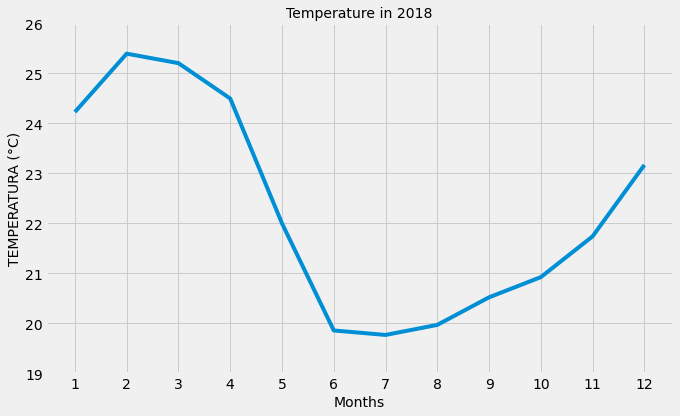

In [58]:
DataYear().plotTemp()

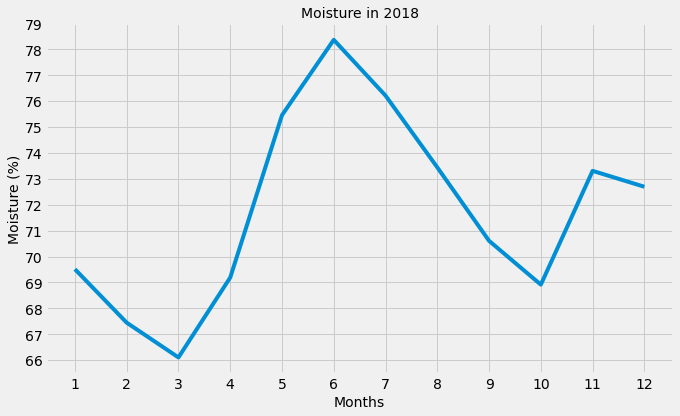

In [59]:
DataYear().plotMoisture()

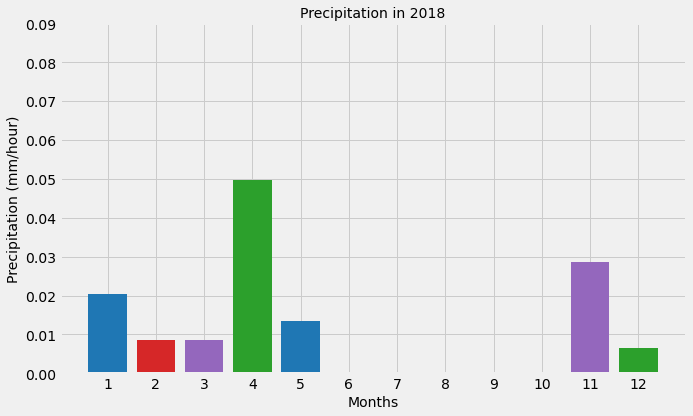

In [60]:
DataYear().plotPresipitation()

### Datos del mes

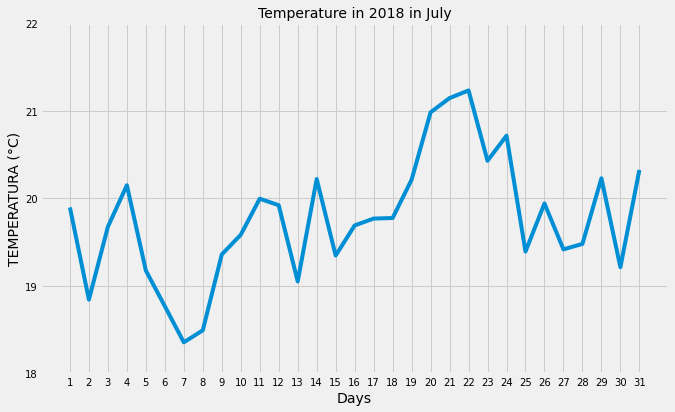

In [46]:
DataYear(month = 'July').plotTemp()

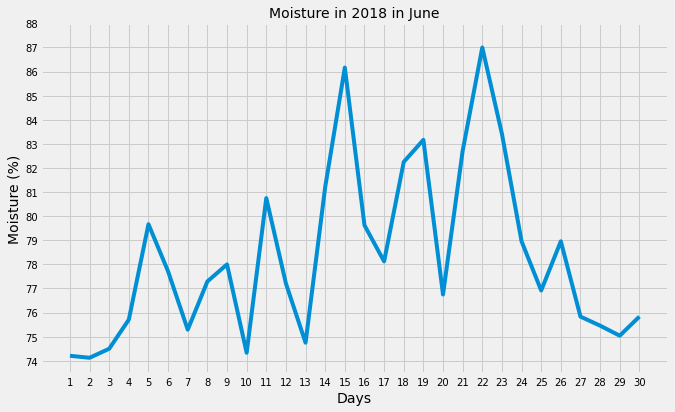

In [62]:
DataYear(month = 'June').plotMoisture()

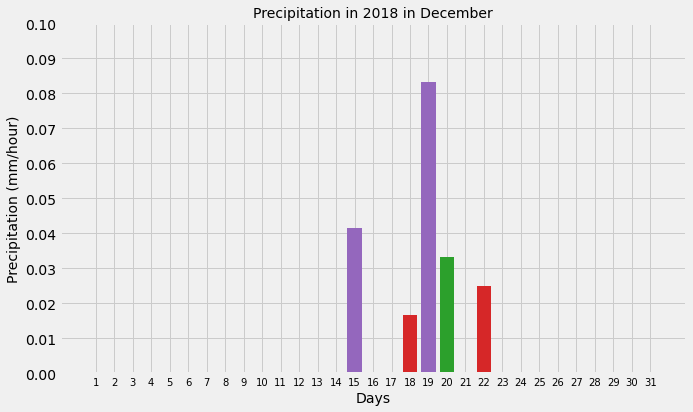

In [64]:
DataYear(month = 'December').plotPresipitation()

### Datos del día

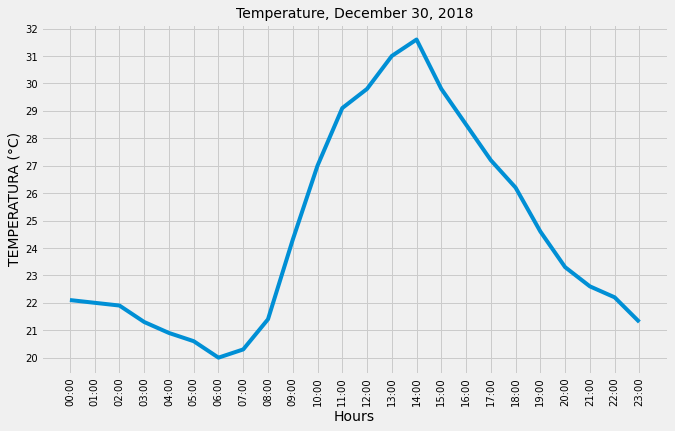

In [54]:
DataYear(month = 'December', day = 30).plotTemp()

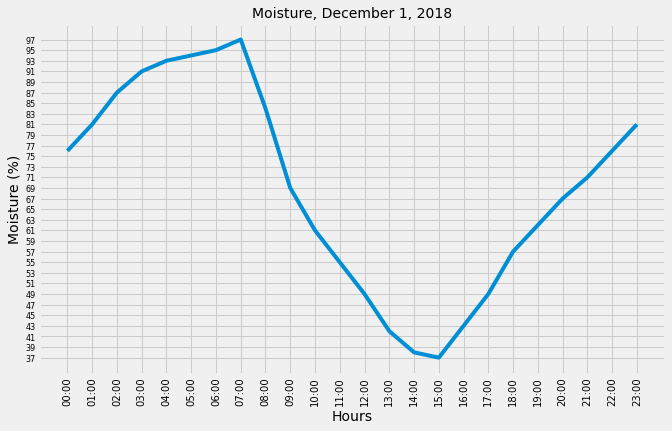

In [53]:
DataYear(month = 'December', day = 1).plotMoisture()